# Import Packages

In [1]:
import pandas as pd
import numpy as np

# Load and visualize weekly stock returns

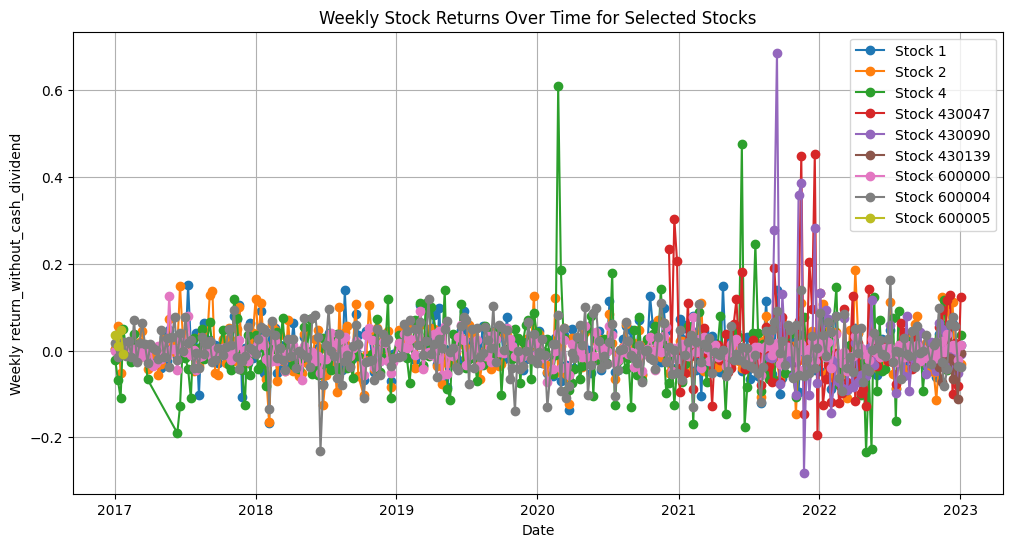

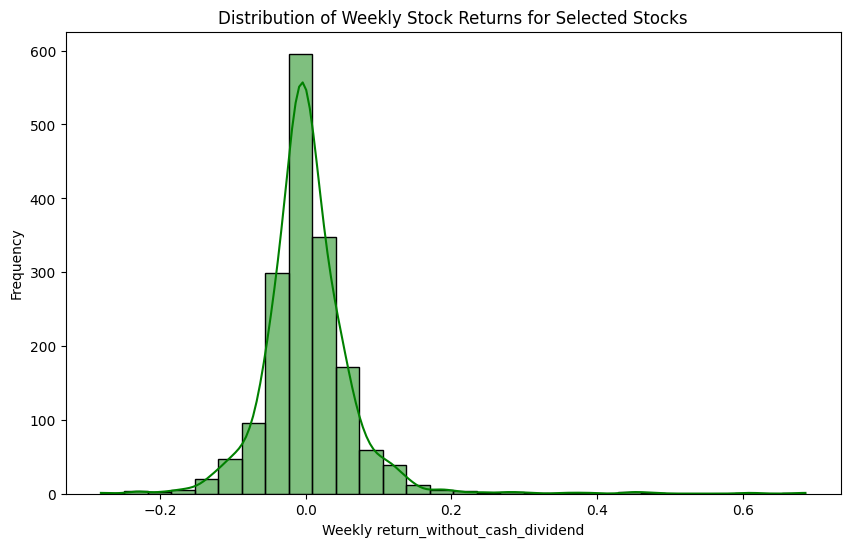

C:\Users\Calvin Thayono\Documents\CUHK\Course Content (New)\Term 8\FMA4200\fma_project\scripts\load_weekly_returns.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date'].dt.year


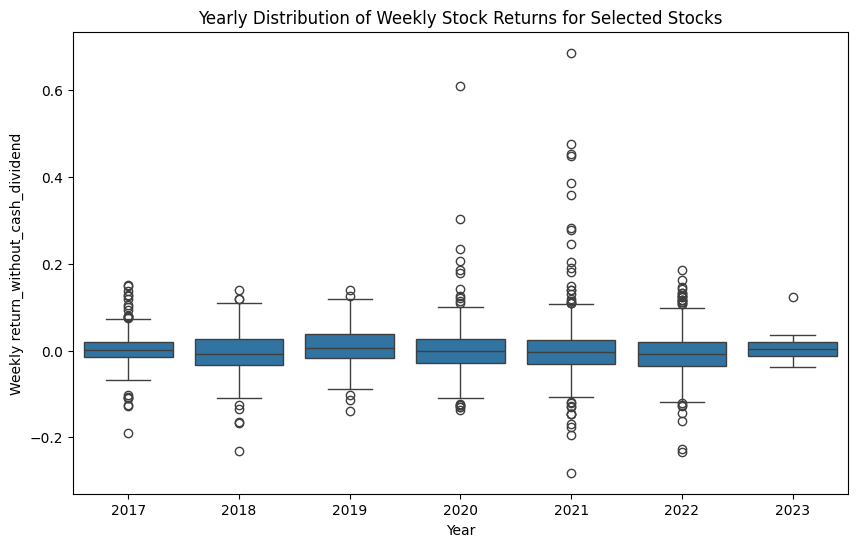

In [2]:
%run scripts/load_weekly_returns.py

In [3]:
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,Date
0,1,2017-01,0.003297,4,2017-01-02
1,1,2017-02,0.003286,4,2017-01-09
2,1,2017-03,0.006550,4,2017-01-16
3,1,2017-04,0.011931,4,2017-01-23
4,1,2017-05,-0.007503,4,2017-01-30
...,...,...,...,...,...
1206568,873527,2022-49,-0.005513,64,2022-12-05
1206569,873527,2022-50,-0.024390,64,2022-12-12
1206570,873527,2022-51,-0.019318,64,2022-12-19
1206571,873527,2022-52,-0.067207,64,2022-12-26


In [4]:
# Drop column 'Date'
weekly_returns = weekly_returns.drop('Date', axis=1)
weekly_returns.columns

Index(['stock_code', 'trading_week', 'return_without_cash_dividend',
       'Markettype'],
      dtype='object')

In [5]:
%run scripts/load_ff_factors.py

# Load risk free rate dataset

In [6]:
# Load csv file
risk_free_rate = pd.read_excel("risk_free_rates/weekly_risk_free_rate.xlsx")
risk_free_rate

,trading_date_yw,risk_free_return
0,2017-01-01,0.000571
1,2017-01-08,0.000738
2,2017-01-15,0.000543
3,2017-01-22,0.000774
4,2017-01-29,0.000802
...,...,...
307,2022-11-26,0.000444
308,2022-12-03,0.000471
309,2022-12-10,0.000477
310,2022-12-17,0.000459


In [7]:
# Convert into datetime object
risk_free_rate['trading_date_yw'] = pd.to_datetime(risk_free_rate['trading_date_yw'])
# Add formatted week-year column
risk_free_rate['week_year'] = risk_free_rate['trading_date_yw'].dt.strftime('%Y-%U')
risk_free_rate

,trading_date_yw,risk_free_return,week_year
0,2017-01-01,0.000571,2017-01
1,2017-01-08,0.000738,2017-02
2,2017-01-15,0.000543,2017-03
3,2017-01-22,0.000774,2017-04
4,2017-01-29,0.000802,2017-05
...,...,...,...
307,2022-11-26,0.000444,2022-47
308,2022-12-03,0.000471,2022-48
309,2022-12-10,0.000477,2022-49
310,2022-12-17,0.000459,2022-50


# GBM Construction

## I. Calculate market return

In [8]:
# Calculate weekly market returns as the mean value of weekly returns of all mainboard stocks
market_return = weekly_returns.groupby('trading_week')['return_without_cash_dividend'].mean().reset_index()
market_return = market_return.rename(columns={'return_without_cash_dividend': 'market_return'})

market_return

,trading_week,market_return
0,2017-01,0.018377
1,2017-02,-0.032801
2,2017-03,-0.015996
3,2017-04,0.018515
4,2017-05,-0.002261
...,...,...
303,2022-49,0.028340
304,2022-50,0.003581
305,2022-51,-0.014400
306,2022-52,-0.048004


## II. Merge necessary dataframes

In [9]:
# Merging market returns
weekly_returns = pd.merge(weekly_returns, 
                          market_return, 
                          left_on='trading_week', 
                          right_on='trading_week',
                          how="left")
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return
0,1,2017-01,0.003297,4,0.018377
1,1,2017-02,0.003286,4,-0.032801
2,1,2017-03,0.006550,4,-0.015996
3,1,2017-04,0.011931,4,0.018515
4,1,2017-05,-0.007503,4,-0.002261
...,...,...,...,...,...
889066,873527,2022-49,-0.005513,64,0.028340
889067,873527,2022-50,-0.024390,64,0.003581
889068,873527,2022-51,-0.019318,64,-0.014400
889069,873527,2022-52,-0.067207,64,-0.048004


In [10]:
# Merging risk free rate
weekly_returns = pd.merge(weekly_returns, 
                          risk_free_rate, 
                          left_on="trading_week", 
                          right_on="week_year", how="left")
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,market_return,trading_date_yw,risk_free_return,week_year
0,1,2017-01,0.003297,4,0.018377,2017-01-01,0.000571,2017-01
1,1,2017-02,0.003286,4,-0.032801,2017-01-08,0.000738,2017-02
2,1,2017-03,0.006550,4,-0.015996,2017-01-15,0.000543,2017-03
3,1,2017-04,0.011931,4,0.018515,2017-01-22,0.000774,2017-04
4,1,2017-05,-0.007503,4,-0.002261,2017-01-29,0.000802,2017-05
...,...,...,...,...,...,...,...,...
889066,873527,2022-49,-0.005513,64,0.028340,2022-12-10,0.000477,2022-49
889067,873527,2022-50,-0.024390,64,0.003581,2022-12-17,0.000459,2022-50
889068,873527,2022-51,-0.019318,64,-0.014400,2022-12-24,0.000432,2022-51
889069,873527,2022-52,-0.067207,64,-0.048004,NaT,NaN,NaN


In [11]:
# Ensure excess returns are calculated against the risk-free rate
weekly_returns['stock_excess_return'] = weekly_returns['return_without_cash_dividend'] - weekly_returns['risk_free_return']
weekly_returns['market_excess_return'] = weekly_returns['market_return'] - weekly_returns['risk_free_return']

# Drop missing values
weekly_returns.dropna(inplace=True)

## III. Stock Prediction using Machine Learning Models (Linear Regression, Random Forest, Gradient Boosting, and Extreme Gradient Boosting)

In [23]:
import statsmodels.api as sm

In [24]:
# Filter the period
period_data = weekly_returns[(weekly_returns['trading_week'] >= '2017-01') & (weekly_returns['trading_week'] <= '2020-52')]
# Filter for the final period
final_period_data = weekly_returns[(weekly_returns['trading_week'] >= '2021-01') & (weekly_returns['trading_week'] <= '2022-52')]

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Assume period_data and final_period_data are loaded and contain the necessary columns

# Feature Engineering
period_data['market_excess_return'] = period_data['market_return'] - period_data['risk_free_return']
final_period_data['market_excess_return'] = final_period_data['market_return'] - final_period_data['risk_free_return']

# Define features and targets
features_period = period_data[['market_excess_return', 'risk_free_return']]
targets_period = period_data['return_without_cash_dividend'] - period_data['risk_free_return']
features_final = final_period_data[['market_excess_return', 'risk_free_return']]
targets_final = final_period_data['return_without_cash_dividend'] - final_period_data['risk_free_return']

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, objective='reg:squarederror')
}

C:\Users\Calvin Thayono\AppData\Local\Temp\ipykernel_68136\1866510814.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['market_excess_return'] = period_data['market_return'] - period_data['risk_free_return']
C:\Users\Calvin Thayono\AppData\Local\Temp\ipykernel_68136\1866510814.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_period_data['market_excess_return'] = final_period_data['market_return'] - final_period_data['risk_free_return']


In [26]:
# Train and evaluate models
for name, model in models.items():
    model.fit(features_period, targets_period)
    predictions = model.predict(features_final)
    mse = mean_squared_error(targets_final, predictions)
    print(f"{name} - Final Period Mean Squared Error: {mse}")

Linear Regression - Final Period Mean Squared Error: 0.0039387430857251386
Random Forest - Final Period Mean Squared Error: 0.003939034823334168
